# Pet Box Subscription

In [ ]:
# import the pandas library
import pandas as pd

In [ ]:
# import the pandas the csv file
df = pd.read_csv('pet_supplies_2212.csv')

In [ ]:
df

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1


In [ ]:
#check for the number of missing values in all column
df.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [ ]:
df.isna().any()

product_id         False
category           False
animal             False
size               False
price              False
sales              False
rating              True
repeat_purchase    False
dtype: bool

## Data Cleaning

In [ ]:
df['category'].isnull().sum()

0

In [ ]:
df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

In [ ]:
df['category'].isna().any()

False

In [ ]:
df['category'] = df['category'].replace('-', 'Unknown')

In [ ]:
df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

In [ ]:
df['animal'].unique()

array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object)

In [ ]:
df['animal'].isna().any()

False

In [ ]:
df['size'].unique()

array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
       'Medium', 'LARGE'], dtype=object)

In [ ]:
df['size'].isna().any()

False

In [ ]:
df['size'] = df['size'].str.capitalize()

In [ ]:
df['price'].isna().any()

False

In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [ ]:
median_value = df['price'].median()

In [ ]:
df['price'].fillna(median_value, inplace=True)

In [ ]:
df

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,Medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,Small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,Small,19.94,658.66,5.0,1


In [ ]:
df.to_csv('price.csv', index=False)

In [ ]:
df['price'] = df['price'].astype(float).round(2)

In [ ]:
df.to_csv('price1.csv', index=False)

In [ ]:
df['sales'].isna().any()

False

In [ ]:
df['rating'].isna().sum()

150

In [ ]:
df['rating'].fillna(0, inplace=True)

In [ ]:
df['rating'].isna().sum()

0

In [ ]:
df['sales'].isna().any()

False

In [ ]:
df['repeat_purchase'].isna().any()

False

In [ ]:
df['repeat_purchase'].isna().sum()

0

In [ ]:
df.describe()

,product_id,price,sales,rating,repeat_purchase
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,29.287873,996.597847,4.492000,0.604000
std,433.157015,7.335833,323.952676,2.105443,0.489228
min,1.000000,12.850000,286.940000,0.000000,0.000000
25%,375.750000,25.000000,747.420000,3.000000,0.000000
50%,750.500000,28.060000,1000.830000,5.000000,1.000000
75%,1125.250000,33.142500,1158.157500,6.000000,1.000000
max,1500.000000,54.160000,2255.960000,9.000000,1.000000


In [ ]:
df.shape

(1500, 8)

In [ ]:
repeat_purchase_by_category = df.groupby('category')['repeat_purchase'].sum()
print(repeat_purchase_by_category)

category
Accessory     70
Equipment    221
Food         151
Housing      152
Medicine     153
Toys         145
Unknown       14
Name: repeat_purchase, dtype: int64


In [ ]:
df.isnull().sum()

product_id         0
category           0
animal             0
size               0
price              0
sales              0
rating             0
repeat_purchase    0
dtype: int64

## Visualizations

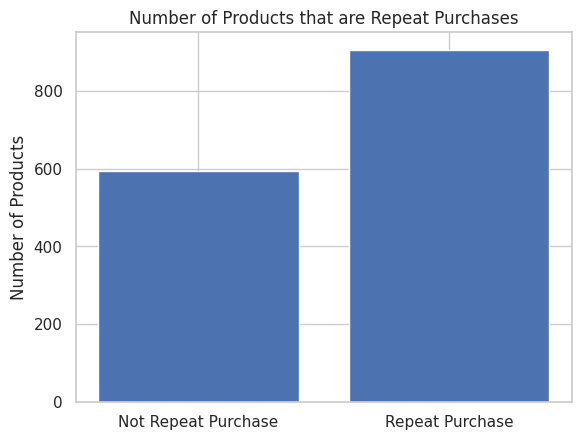

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# count the number of repeat purchases
repeat_purchases = df['repeat_purchase'].value_counts()

# create a bar chart
plt.bar(repeat_purchases.index, repeat_purchases.values)
plt.xticks([0, 1], ['Not Repeat Purchase', 'Repeat Purchase'])
plt.ylabel('Number of Products')
plt.title('Number of Products that are Repeat Purchases')
plt.savefig('Graph 1_i.png')

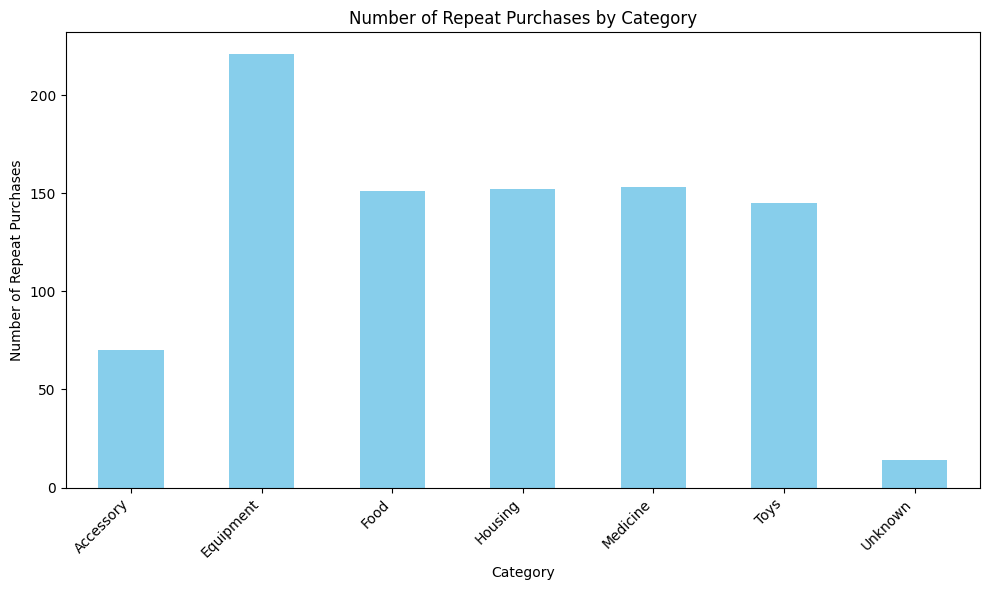

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping the data by category and calculating the sum of repeat_purchase
category_repeat_purchases = df.groupby('category')['repeat_purchase'].sum()

# Creating the bar chart
plt.figure(figsize=(10, 6))
category_repeat_purchases.plot(kind='bar', color='skyblue')
plt.title('Number of Repeat Purchases by Category')
plt.xlabel('Category')
plt.ylabel('Number of Repeat Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Task2.png')

In [ ]:
repeat_purchase_count = df['repeat_purchase'].sum()
print("Number of products with repeat_purchase = 1:", repeat_purchase_count)

Number of products with repeat_purchase = 1: 906


In [ ]:
repeat_purchase_zero_count = len(df[df['repeat_purchase'] == 0])

print("Number of products with repeat_purchase = 0:", repeat_purchase_zero_count)

Number of products with repeat_purchase = 0: 594


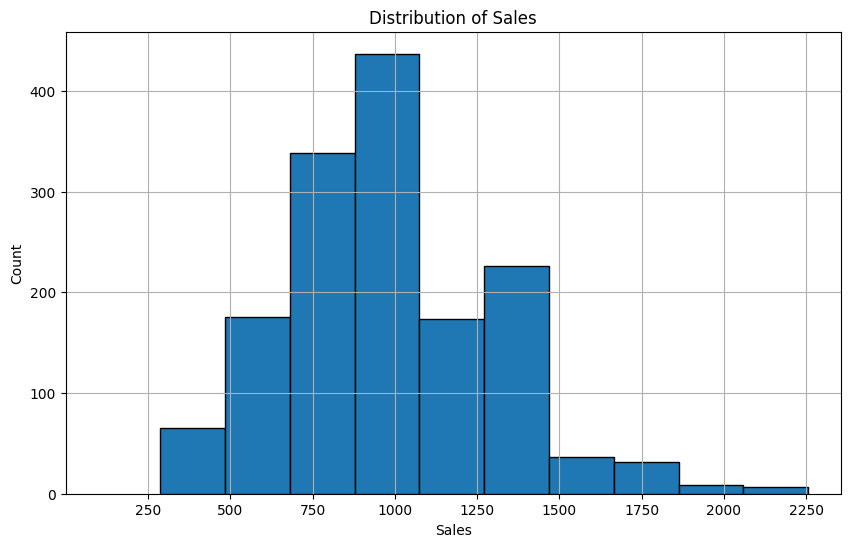

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the sales values
sales = df['sales']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(sales, bins=10, edgecolor='black')  # You can adjust the number of bins
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.xlim(0)  # Set the lower limit of x-axis to zero
plt.ylim(0)
x_ticks_interval = 250.0  # Specify the interval between ticks on the x-axis (as a float)
x_ticks = [i * x_ticks_interval for i in range(int(min(sales) / x_ticks_interval), int(max(sales) / x_ticks_interval) + 1)]
plt.xticks(x_ticks)  # Set the x-axis tick positions
plt.grid(True)
plt.savefig('Task 3.png')


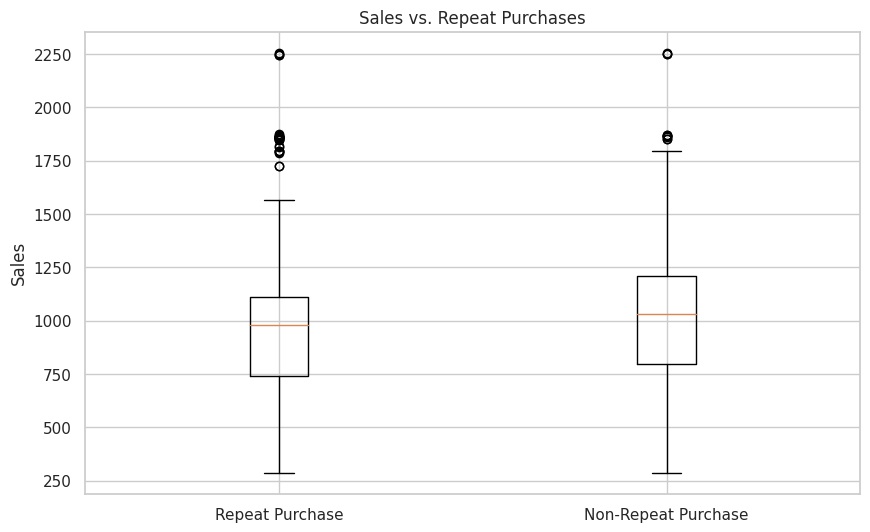

Repeat Purchase - Mean Sales: 975.7683995584988
Repeat Purchase - Median Sales: 978.21
Non-Repeat Purchase - Mean Sales: 1028.3680134680135
Non-Repeat Purchase - Median Sales: 1030.185


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Separate sales based on repeat_purchase values
repeat_purchase_sales = df[df['repeat_purchase'] == 1]['sales']
non_repeat_purchase_sales = df[df['repeat_purchase'] == 0]['sales']

# Calculate summary statistics
repeat_purchase_mean = repeat_purchase_sales.mean()
repeat_purchase_median = repeat_purchase_sales.median()
non_repeat_purchase_mean = non_repeat_purchase_sales.mean()
non_repeat_purchase_median = non_repeat_purchase_sales.median()

# Create a box plot to visualize the distribution of sales for both groups
plt.figure(figsize=(10, 6))
plt.boxplot([repeat_purchase_sales, non_repeat_purchase_sales], labels=['Repeat Purchase', 'Non-Repeat Purchase'])
plt.title('Sales vs. Repeat Purchases')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Print summary statistics
print("Repeat Purchase - Mean Sales:", repeat_purchase_mean)
print("Repeat Purchase - Median Sales:", repeat_purchase_median)
print("Non-Repeat Purchase - Mean Sales:", non_repeat_purchase_mean)
print("Non-Repeat Purchase - Median Sales:", non_repeat_purchase_median)


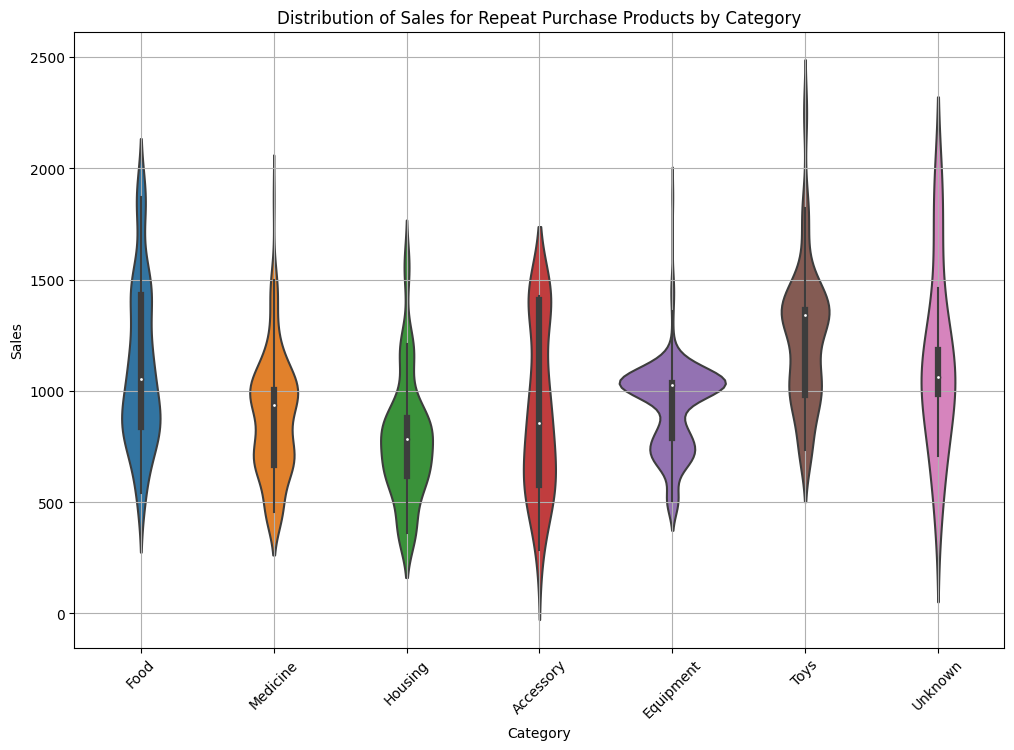

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only repeat purchase products
repeat_purchase_df = df[df['repeat_purchase'] == 1]

plt.figure(figsize=(12, 8))
sns.violinplot(data=repeat_purchase_df, x='category', y='sales')
plt.title('Distribution of Sales for Repeat Purchase Products by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('Task4.png')
